In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_final = pd.read_csv(r'C:\mydata\G8Vitamin\data\final\LOCMM_06062025_Baseline1.csv')
# # === Step 1: Create label from VitaminD ===
# def assign_label(x):
#     if pd.isna(x):
#         return None
#     elif x < 50:
#         return 0
#     elif x >= 50 and x < 125:
#         return 1
#     else:
#         return 2

# df_final['label'] = df_final['VitaminD'].apply(assign_label)

# === Bước 2: Trích năm đầu tiên từ chuỗi "2001-2002" ===
df_final['YearStart'] = df_final['YearID'].astype(str).str.extract(r'(\d{4})').astype(int)

def binary_vitamin_d_label(row):
    val = row['VitaminD']
    year = row['YearStart']

    if pd.isna(val) or pd.isna(year):
        return None  # hoặc np.nan

    if year in [2001, 2003]:
        return 1 if val < 20 else 0
    else:
        return 1 if val < 50 else 0

df_final['label'] = df_final.apply(binary_vitamin_d_label, axis=1)

# === Bước 3: Tách dữ liệu theo mốc năm 2013 ===
df_final_train = df_final[df_final['YearStart'] <= 2013]
df_final_test = df_final[df_final['YearStart'] > 2013]

# === Bước 4: Ghi ra file CSV ===
df_final_train.to_csv(r'c:\mydata\G8Vitamin\data\final\baselinestore\train.csv', index=False)
df_final_test.to_csv(r'c:\mydata\G8Vitamin\data\final\baselinestore\test.csv', index=False)

# === Log số dòng để xác nhận ===
print(f"✅ Số dòng train: {len(df_final_train)} được lưu vào train.csv")
print(f"✅ Số dòng test : {len(df_final_test)} được lưu vào test.csv")


✅ Số dòng train: 49229 được lưu vào train.csv
✅ Số dòng test : 13145 được lưu vào test.csv


C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_11416\1177539445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df_final_train, palette='viridis')


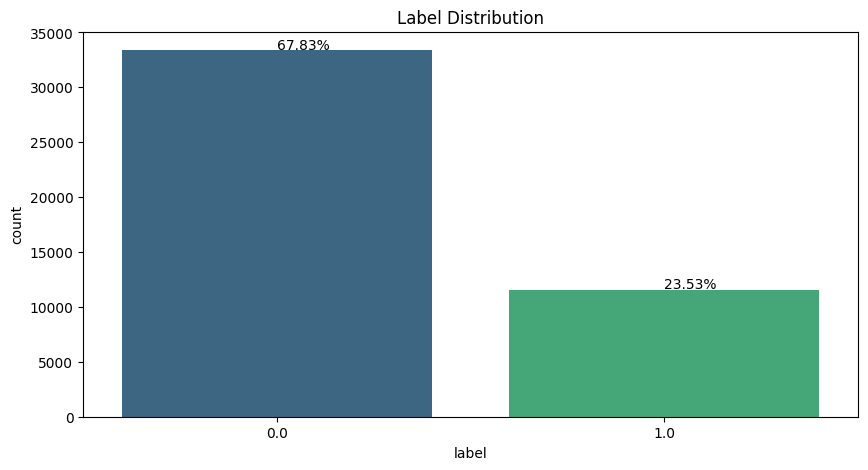

In [18]:
# Draw label distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label', data=df_final_train, palette='viridis')
plt.title('Label Distribution')
for i, rec in enumerate(ax.patches):
    ax.text(
        rec.get_x() + rec.get_width()/2,
        rec.get_height() + 100,
        f'{rec.get_height()/len(df_final_train)*100:.2f}%',
    )
plt.show()

In [ ]:
df_final_train.dropna(inplace=True)
df_final_test.dropna(inplace=True)

In [ ]:
df_final_train.to_csv(r'c:\mydata\G8Vitamin\data\final\baselinestore\processed_train.csv', index=False)
df_final_test.to_csv(r'c:\mydata\G8Vitamin\data\final\baselinestore\processed_test.csv', index=False)